In [16]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
loan_data = pd.read_csv("C:/Users/HOME/Documents/Upgrad/casestudy_I/loan.csv",low_memory=False)
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [18]:
## Tail of rows
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [19]:
#Drop columns with single data and irrelevant data
loan_data.drop(['pymnt_plan', 'initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt','id', 'member_id', 'url', 'title', 'emp_title', 'zip_code', 'last_credit_pull_d', 'addr_state','desc','out_prncp_inv','total_pymnt_inv','funded_amnt', 'delinq_2yrs', 'revol_bal', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d' , 'chargeoff_within_12_mths', 'mths_since_last_delinq', 'mths_since_last_record'], axis = 1, inplace = True)

In [20]:
## Common method to convert string column to float
def handle_column_as_float(column,replace_string,replaced):
    column = column.apply(lambda x: x.replace(replace_string,replaced))
    column = column.astype(float)
    return column

In [21]:
## Convert int_rate to float column
loan_data.int_rate = handle_column_as_float(loan_data.int_rate,'%','')

<Axes: ylabel='annual_inc'>

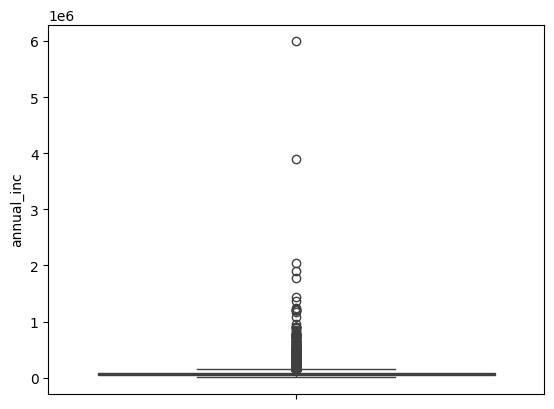

In [22]:
## Checking for outliers in annual income columns
sns.boxplot(loan_data.annual_inc)

In [23]:
## Replace Source Verified to Verified
loan_data.verification_status = loan_data.verification_status.apply(lambda x: x.replace("Source Verified","Verified"))

In [24]:
## drop rows where emp_length and revol_util are null
loan_data.dropna(subset=['emp_length', 'revol_util'], inplace=True)

In [25]:
# Removing unncessary fields in emp_length and having it as a integer for analysis
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [26]:
# Removing outliers for annual income which was originally present in the data set.
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

<Axes: xlabel='term', ylabel='count'>

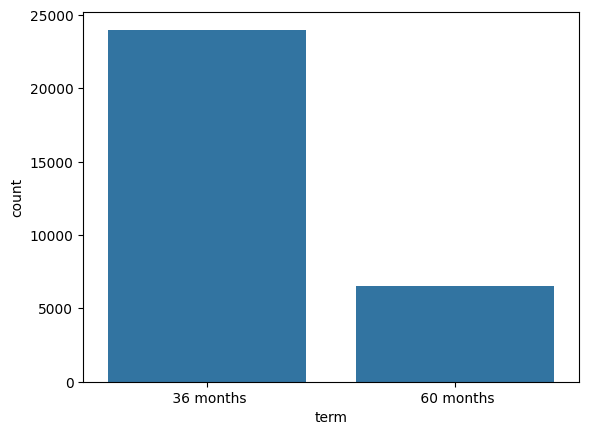

In [27]:
## The below 2 graph shows that the longer the duration, the greater chances of being Charged Off
sns.countplot(x = 'term', data = loan_data[loan_data.loan_status == 'Fully Paid'])

<Axes: xlabel='term', ylabel='count'>

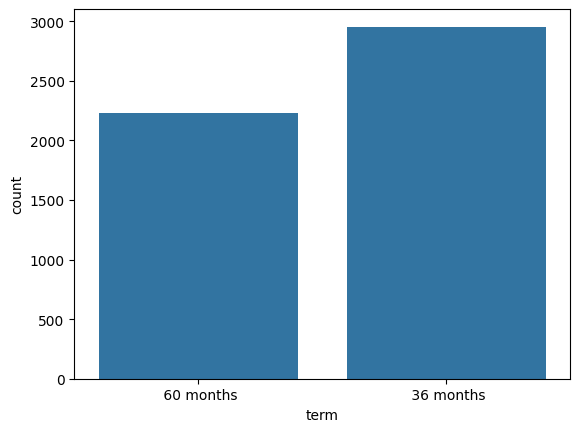

In [28]:
sns.countplot(x = 'term', data = loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

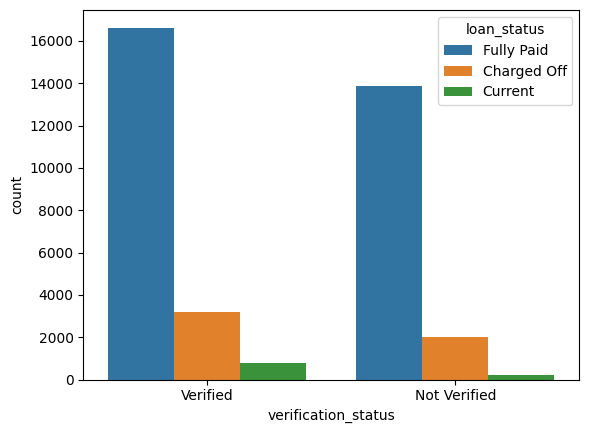

In [29]:
## More Likey that the verified loan status does not get charged Off. So the lending company should verify the application status before loan approval
sns.countplot(x ='verification_status', hue = 'loan_status', data = loan_data)

<Axes: xlabel='emp_length', ylabel='count'>

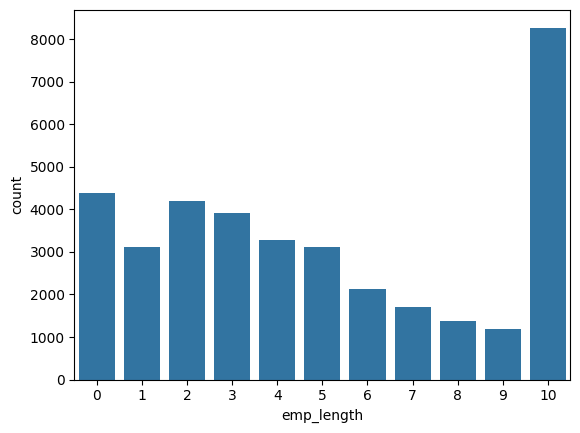

In [30]:
## The people likely to take loan are usually people with 10+ experience
sns.countplot(x = 'emp_length', data = loan_data)

<Axes: xlabel='home_ownership', ylabel='count'>

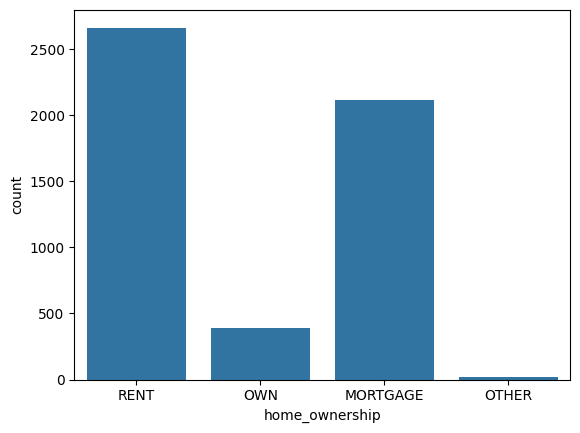

In [31]:
# People who have a own house are less likely to become 'Defaulters'
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='purpose'>

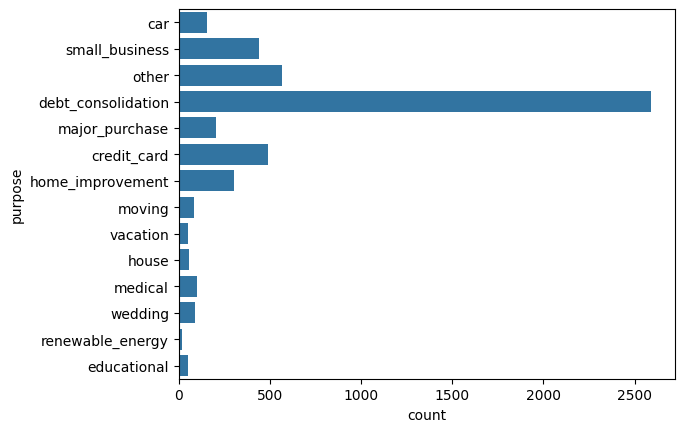

In [32]:
#Likely that poeple with existing debts are likely to be 'Defaulters'. Lending company should re-verify these applicatios before lending loans 
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])

In [33]:
## Grouping dti - candidate for loan is with a smaller dti
## Derived Metrics categorical 
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=6,precision =2,labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

<Axes: xlabel='dti_groups', ylabel='count'>

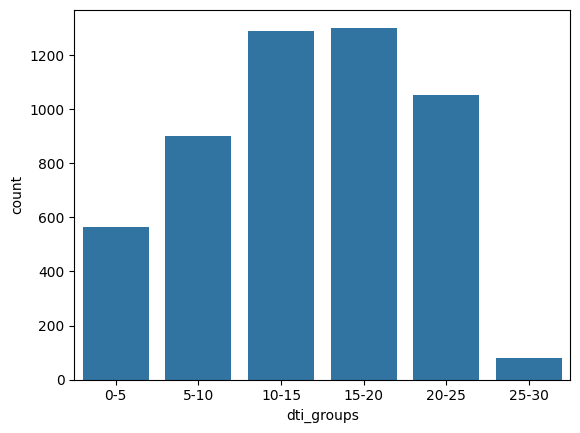

In [34]:
# dti- groups for Charged Off Applicants
## Derived Metrics - categorical 
sns.countplot(x ='dti_groups', data=loan_data[loan_data['loan_status'] == 'Charged Off'])

In [35]:
#Gropuping Interest Rates
loan_data['int_rate_group'] = pd.cut(loan_data['int_rate'], bins=4,precision =2,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])

<Axes: xlabel='int_rate_group', ylabel='count'>

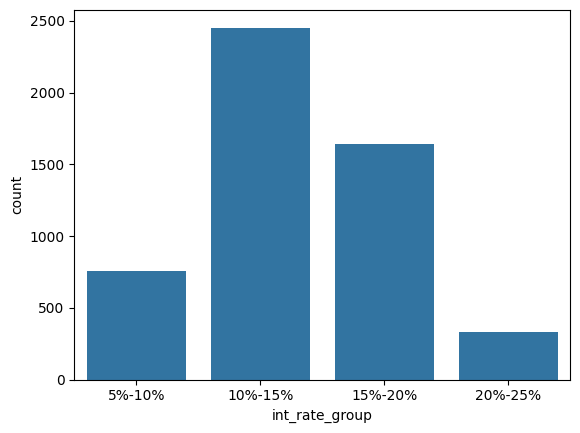

In [36]:
# Loans with interest rate group of 10-20% are charged off the max
sns.countplot(x ='int_rate_group', data=loan_data[loan_data.loan_status == 'Charged Off'])

In [37]:
## Analysis based on dates - 
## Extracting month and year
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

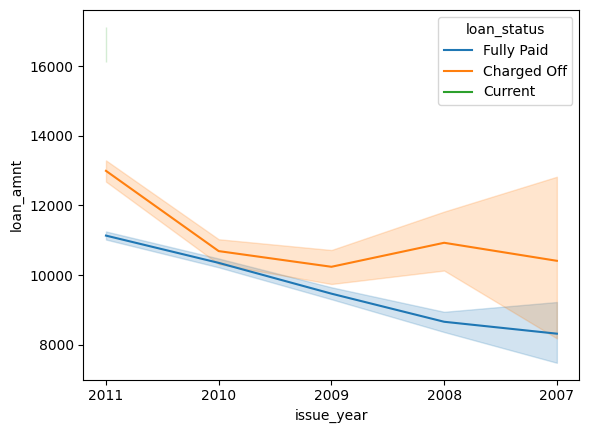

In [38]:
## Based on the belo graph, 2011 was the year when loan was charged off the most.
sns.lineplot(x = 'issue_year',y='loan_amnt', data = loan_data,hue = 'loan_status')


<Axes: xlabel='issue_month', ylabel='loan_amnt'>

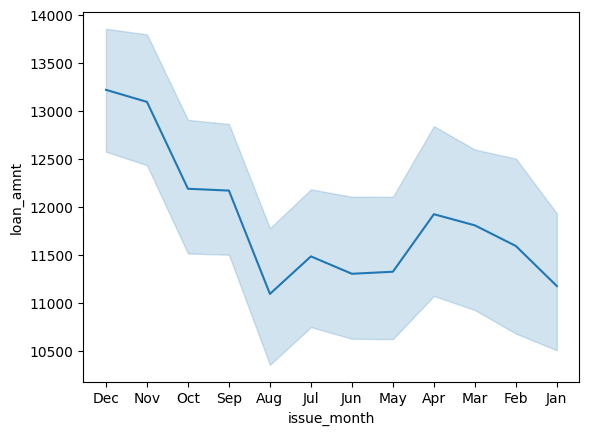

In [39]:
## Based on the belo graph, 2011 was the year when loan was charged off the most.
## December is the month where most of the loan is charged off.
sns.lineplot(x = 'issue_month',y='loan_amnt', data = loan_data[loan_data.loan_status=='Charged Off'])

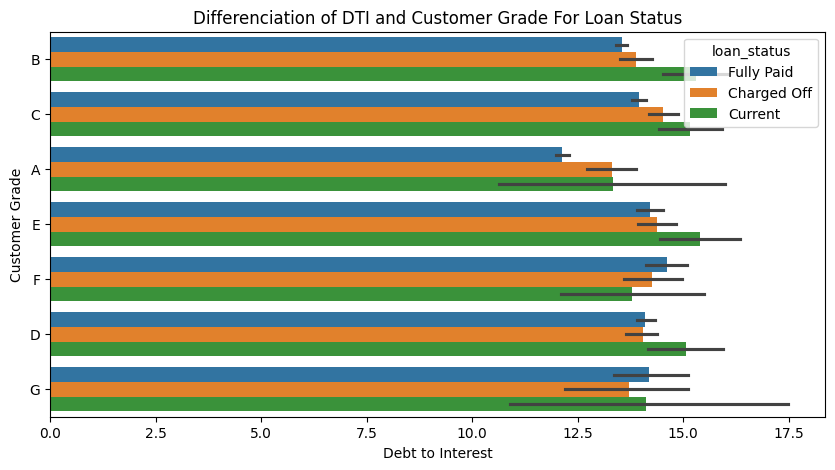

In [40]:
## BIVARIATE ANALYSIS - POSSIBLE COMBINATIONS (Interest Rate,Grades,Debt To Income,Annual Income and Other Columns)
# Differenciation of Debt to Interest over Customer grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=loan_data,x='dti',y='grade',hue='loan_status')
plt.xlabel('Debt to Interest')
plt.ylabel('Customer Grade')
plt.title('Differenciation of DTI and Customer Grade For Loan Status',fontsize=12)
plt.show()

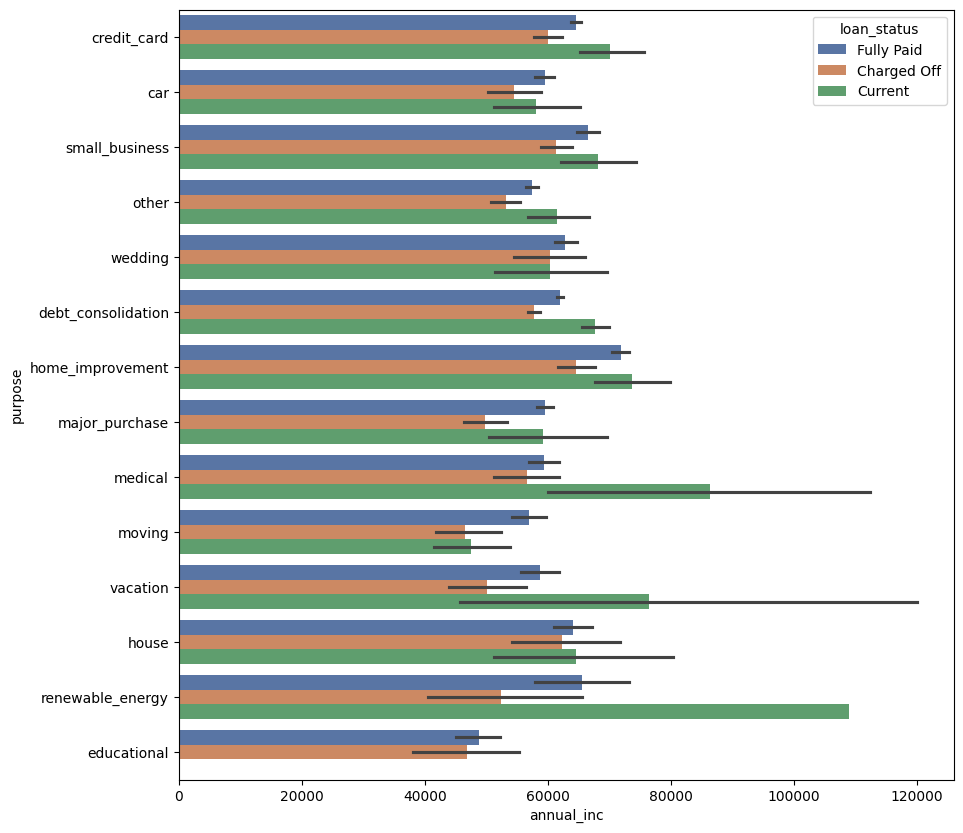

In [41]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

In [42]:
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

In [ ]:
## Analysis - The interest rates for Charged Off loan is high. So, if the period is high and the interest rates are high, it is very likely
## that the loan will be Charged Off. Lending company should refrain from such a situation

plt.tight_layout()
sns.catplot(data =loan_data,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

## Analysis and Observations

1.The higher the period of the loan, the more chances that it could get 'Charged Off'
2.Appicants with already existing debts are likely to have their loan 'Charged Off'
3.Employees in the higher grade are more likely to apply for loans
4.The years in which most of the loans are charged of is 2011
5.December is the month where most of the loans are Charged Off
6.People who have taken loan for 'Home Improvement' are the ones 'Charged Off'
7.Loans are 'Charged Off' if the dti value is high
8.People who have a own house are less likely to have their loans 'Charged Off'
9.Lending companies should verify the loan application